# Evaluate birth data  

In [1]:
import pandas as pd
from ast import literal_eval

In [2]:
birth = pd.read_csv('../becca/results_df_with_predictions.csv')
birth.shape

(64874, 36)

In [3]:
birth.columns

Index(['Unnamed: 0.1', 'VIAF_titlelist', 'author', 'S2_titlelist', 'status',
       'pub_age', 'avg_pubdate', 'VIAF_birthdate', 'overlapping_words',
       'word_overlap_count', 'lemma_overlap', 'overlapping_lemmas',
       'cosine_matches', 'sim_scores', 'Unnamed: 0', 'record_enumerated',
       'record_count', 'pub_age.1', 'status.1', 'avg_pubdate.1',
       'birth2maxdate', 'birth2mindate', 'abs_birth2maxdate',
       'abs_birth2mindate', 'publication_age', 'VIAF_birthdate.1',
       'lemma_overlap.1', 'word_overlap_count.1', 'Jaccard_Distance',
       'exact_matches', 'exact_match_count', 'cosine_distance',
       'sim_scores_mean', 'predictions', 'probability_class_0',
       'probability_class_1'],
      dtype='object')

<Axes: >

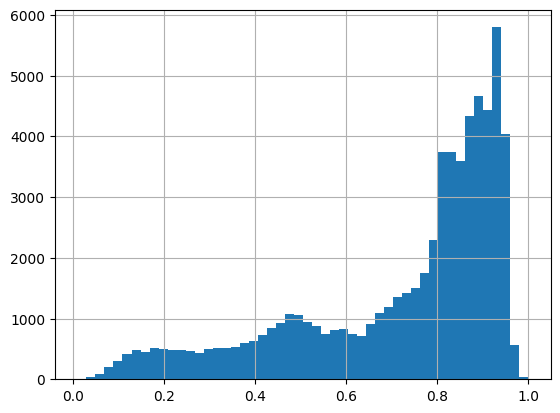

In [7]:
birth['probability_class_0'].hist(bins=50)

In [5]:
birth.head()

,Unnamed: 0.1,VIAF_titlelist,author,S2_titlelist,status,pub_age,avg_pubdate,VIAF_birthdate,overlapping_words,word_overlap_count,...,lemma_overlap.1,word_overlap_count.1,Jaccard_Distance,exact_matches,exact_match_count,cosine_distance,sim_scores_mean,predictions,probability_class_0,probability_class_1
0,0,[],c f williamson,"[nan, nan, nan, nan, 'Two Notes on the Poems o...",0,109.0,1969.333333,1860.0,[],0,...,0,0,NaN,NaN,NaN,0.871143,0.0,0,0.82,0.18
1,1,['America : the diary of a visit winter 1884-1...,david halliburton,[nan],0,-1950.0,0.000000,1950.0,[],0,...,0,0,NaN,NaN,NaN,1.013839,0.0,0,0.81,0.19
2,2,"['Budget speech, 1961:', 'eBay website, IMS Vi...",david halliburton,[nan],0,-1921.0,0.000000,NaN,[],0,...,0,0,NaN,NaN,NaN,0.804021,0.0,0,0.85,0.15
3,3,"['Faces of Hope, c1997:']",david halliburton,[nan],0,0.0,0.000000,0.0,[],0,...,0,0,NaN,NaN,NaN,0.770158,0.0,0,0.84,0.16
4,4,[],david halliburton,[nan],0,0.0,0.000000,0.0,[],0,...,0,0,NaN,NaN,NaN,0.499953,0.0,0,0.80,0.20


In [13]:
# Filter the rows where probability_class_1 > 0.95
trusted = birth[birth['probability_class_1'] > 0.75]
# Remove rows where VIAF_birthdate is NaN
trusted = trusted.dropna(subset=['VIAF_birthdate'])

# Select the required columns and filter out rows with NaN values in S2_titlelist and VIAF_titlelist
trusted = trusted[['author', 'VIAF_birthdate', 'probability_class_1', 'S2_titlelist', 'VIAF_titlelist']]
#trusted['S2_titlelist'] = trusted['S2_titlelist'].apply(literal_eval)
#trusted['VIAF_titlelist'] = trusted['VIAF_titlelist'].apply(literal_eval)
#trusted['S2_titlelist'] = trusted['S2_titlelist'].apply(lambda x: [item for item in x if not pd.isna(item)])
#trusted['VIAF_titlelist'] = trusted['VIAF_titlelist'].apply(lambda x: [item for item in x if not pd.isna(item)])

# Sort the dataframe by probability_class_1 in descending order
trusted = trusted.sort_values(by='probability_class_1', ascending=False)
print(trusted.shape)
# Display the resulting dataframe
trusted.head()

(1459, 5)


,author,VIAF_birthdate,probability_class_1,S2_titlelist,VIAF_titlelist
6069,catherine j minter,1950.0,0.98,"['Literary ""Empfindsamkeit"" and Nervous Sensib...","[""Börne's Leben"", 'The concept of irritability..."
59221,ann lawson lucas,1937.0,0.98,['Le Avventure di Pinocchio/The Adventures of ...,"['The adventures of Pinocchio', 'Bibliografie ..."
1517,robin howells,1950.0,0.96,"[""L'Utopie narrative en France et en Angleterr...","[""Autour de Bernardin de Saint-Pierre : les éc..."
59124,hugh sacker,1925.0,0.96,"[nan, 'The Message of the ""Nibelungenlied"", an...","['An introduction to Wolfram\'s ""Parzival""', '..."
11639,tassie gwilliam,1954.0,0.96,"['""Scenes of Horror,"" Scenes of Sensibility: S...","['""Like Tiresias"" : metamorphosis and gender i..."


In [14]:
trusted.to_csv('trusted_author_birthdates.csv', index=False, sep = '\t')

<Axes: >

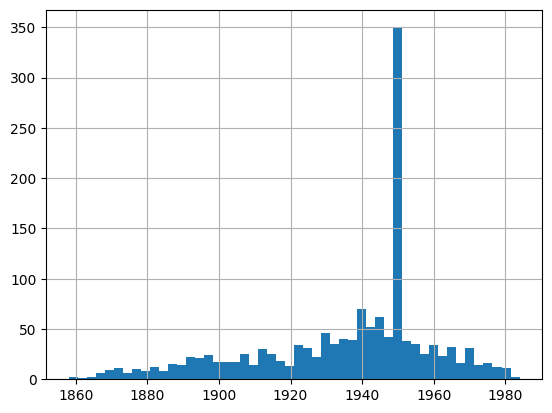

In [15]:
trusted['VIAF_birthdate'].hist(bins=50)